Portfolio Part II
- Name: Hawraa H A E Ali 
- Student ID: up2290783

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px #interactive charts
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore") 

In [30]:
#Configure visual settings

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exercise 1: Generate Random DataFrame

In [43]:
data = np.random.randn(6,4)
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D'], index=[f'Row{i}' for i in range(1,7)])

try:
    display(df.style.set_caption("Generated DataFrame with Random Values").format("{:.2f}"))
except:
    print("\nGenerated DataFrame:")
    print(df)

#Print Summary, Shape and Statistics
print("\nSummary:")
df.info()
print("\nShape:", df.shape)
print("\nStatistics:")
print(df.describe())

,A,B,C,D
Row1,-0.24,-0.79,1.41,-0.09
Row2,2.01,-0.01,-2.55,-0.08
Row3,0.41,-0.84,-0.15,0.01
Row4,-1.15,1.29,0.01,0.30
Row5,-0.07,-2.15,-2.30,-0.71
Row6,-0.87,1.42,-0.02,-0.14



Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Row1 to Row6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 412.0+ bytes

Shape: (6, 4)

Statistics:
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.013700 -0.180606 -0.598067 -0.118238
std    1.125497  1.375209  1.526656  0.330647
min   -1.151114 -2.149671 -2.550709 -0.711435
25%   -0.712473 -0.829701 -1.759465 -0.128292
50%   -0.155732 -0.403321 -0.085564 -0.085317
75%    0.289174  0.966391  0.005892 -0.009363
max    2.005357  1.421543  1.414488  0.299303


Exercise 2: Boxplots of Iris dataset

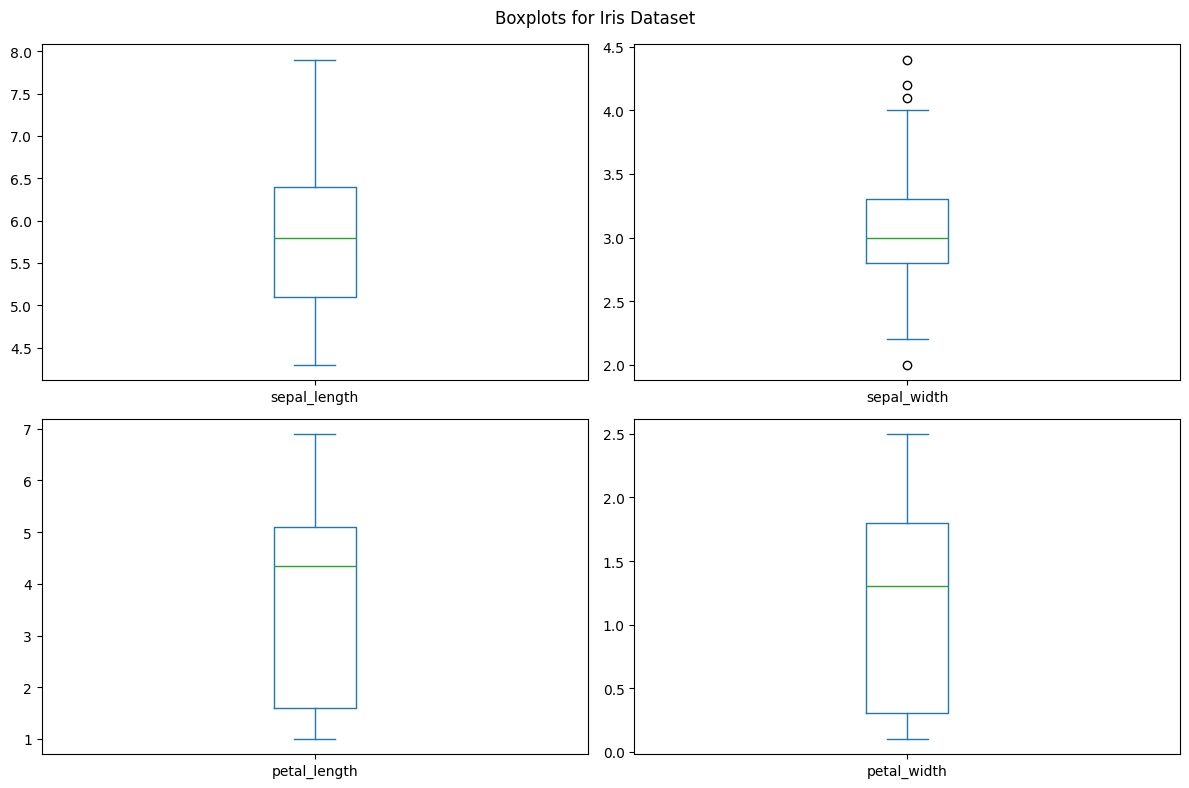

In [3]:
iris = sns.load_dataset('iris')
iris.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(2,2), title='Boxplots for Iris Dataset', figsize=(12,8))
plt.tight_layout()
plt.show()

Exercise 3: Sunburst chart using Tips dataset

In [44]:
tips = sns.load_dataset('tips')
fig = px.sunburst(
    tips,
    path=['sex', 'day', 'time'],
    values='tip',
    title='Tips by Sex, Day & Time'
)
fig.show()

Exercise 4: Simple Linear Regression

Predicted tip for a $50 bill: $6.17


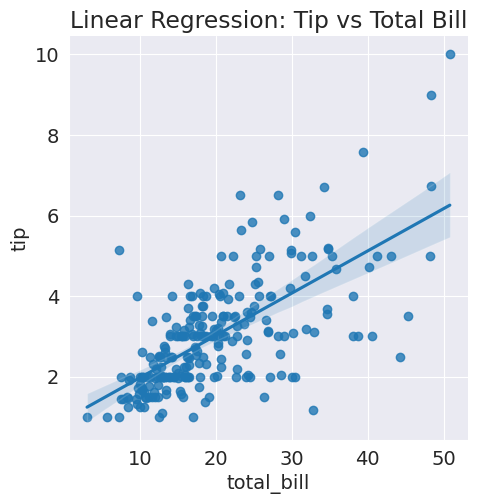

In [45]:
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

#Predict tip for a $50 total bill

total_bill = pd.DataFrame({'total_bill': [50]})
predicted_tip = model.predict(total_bill)
print(f"Predicted tip for a $50 bill: ${predicted_tip[0]:.2f}")

#Regression line visualization
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.title('Linear Regression: Tip vs Total Bill')
plt.show()

Exercise 5: Titanic Decision tree with One-Hot Encoding

Model Accuracy: 69.23%
Prediction for single passenger: 1


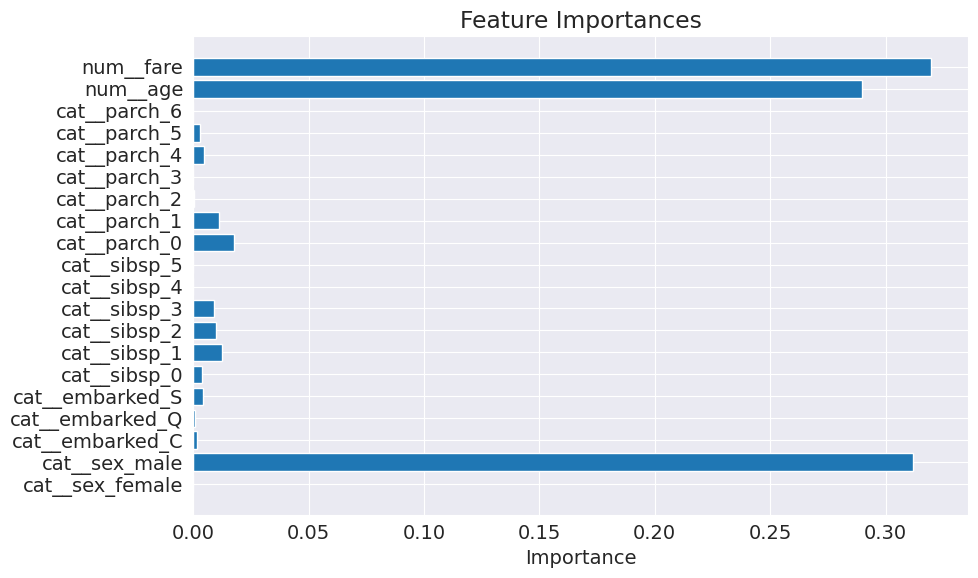

In [46]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'sex', 'age', 'fare', 'sibsp', 'parch', 'embarked']].dropna()
X = titanic.drop('survived', axis=1)
y = titanic['survived']

cat_features = ['sex', 'embarked', 'sibsp', 'parch']
num_features = ['age', 'fare']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_features),
    ('num', 'passthrough', num_features)
])

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

single_passenger = pd.DataFrame([{
    'sex' : 'female', 'age': 29, 'fare': 72.5, 'sibsp': 1, 'parch': 1, 'embarked': 'S'
    }])
print("Prediction for single passenger:", clf_pipeline.predict(single_passenger)[0])

feature_names = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = clf_pipeline.named_steps['classifier'].feature_importances_
plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

The End :)